In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_excel('World_development_mesurement.xlsx')
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [4]:
data["Country"].nunique()

208

In [5]:
#create a labelEncoder adjust
le = LabelEncoder() 

#fit and transform the "Country" column to the DataFrame
data["Country_code"] = le.fit_transform(data["Country"])
data["Country_code"]=data["Country_code"].astype(float)
data.drop(["Country"],axis=1,inplace=True)

In [6]:
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_code
0,0.020,NaN,87931.0,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",5.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",20.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",25.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",29.0


In [7]:
##Remove $ from columns
data['GDP']=data['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
data['GDP']=pd.to_numeric(data['GDP'],errors='coerce')

data['Health Exp/Capita']=data['Health Exp/Capita'].astype(str).str.replace('$','',regex=True)
data['Health Exp/Capita']=pd.to_numeric(data['Health Exp/Capita'],errors='coerce')


data['Tourism Inbound']=data['Tourism Inbound'].astype(str).str.replace('$','',regex=True).str.replace('','')
data['Tourism Inbound']=pd.to_numeric(data['Tourism Inbound'],errors='coerce')


data['Tourism Outbound']=data['Tourism Outbound'].astype(str).str.replace('$','',regex=True).str.replace('','')
data['Tourism Outbound']=pd.to_numeric(data['Tourism Outbound'],errors='coerce')

#Remove %
data['Business Tax Rate']=data['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
data['Business Tax Rate']=pd.to_numeric(data['Business Tax Rate'],errors='coerce')

data['Number of Records']=data['Number of Records'].astype('float64')
data['Population Total']=data['Population Total'].astype('float64')
data['Country_code']=data['Country_code'].astype('float64')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       1932 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [9]:
#Drop 'Number of Records' column
data = data.drop(['Number of Records'],axis=1)

In [10]:
#check columns
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_code'],
      dtype='object')

In [11]:
data = data.rename(columns={'Birth Rate':'BirthRate', 'Business Tax Rate':'BusinessTaxRate', 'CO2 Emissions':'CO2Emissions',
       'Days to Start Business':'DaystoStartBusiness', 'Ease of Business':'EaseofBusiness', 'Energy Usage':'EnergyUsage', 'GDP':'GDP',
       'Health Exp % GDP': 'HealthExpGDP', 'Health Exp/Capita':'HealthExpCapita', 'Hours to do Tax':'HourstodoTax',
       'Infant Mortality Rate':'InfantMortalityRate', 'Internet Usage':'InternetUsage', 'Lending Interest':'LendingInterest',
       'Life Expectancy Female':'LifeExpectancyFemale', 'Life Expectancy Male':'LifeExpectancyMale', 'Mobile Phone Usage':'MobilePhoneUsage',
       'Population 0-14': 'Population0to14', 'Population 15-64':'Population15to64', 'Population 65+':'Populationmorethan65',
       'Population Total':'PopulationTotal', 'Population Urban':'PopulationUrban', 'Tourism Inbound':'TourismInbound',
       'Tourism Outbound': 'TourismOutbound', 'Country_encoded':'Countryencoded'})
                   
data.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound', 'Country_code'],
      dtype='object')

In [12]:
#check the missing value
data.isnull().sum().sum()

16772

In [13]:
#check the null value in datset
data.isnull().sum()

BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          772
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound          2704
TourismOutbound         2704
Country_code               0
dtype: int64

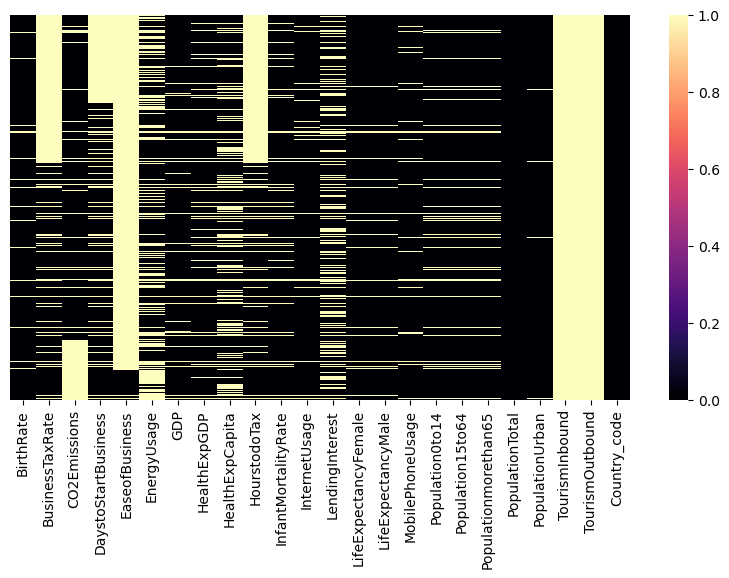

In [14]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

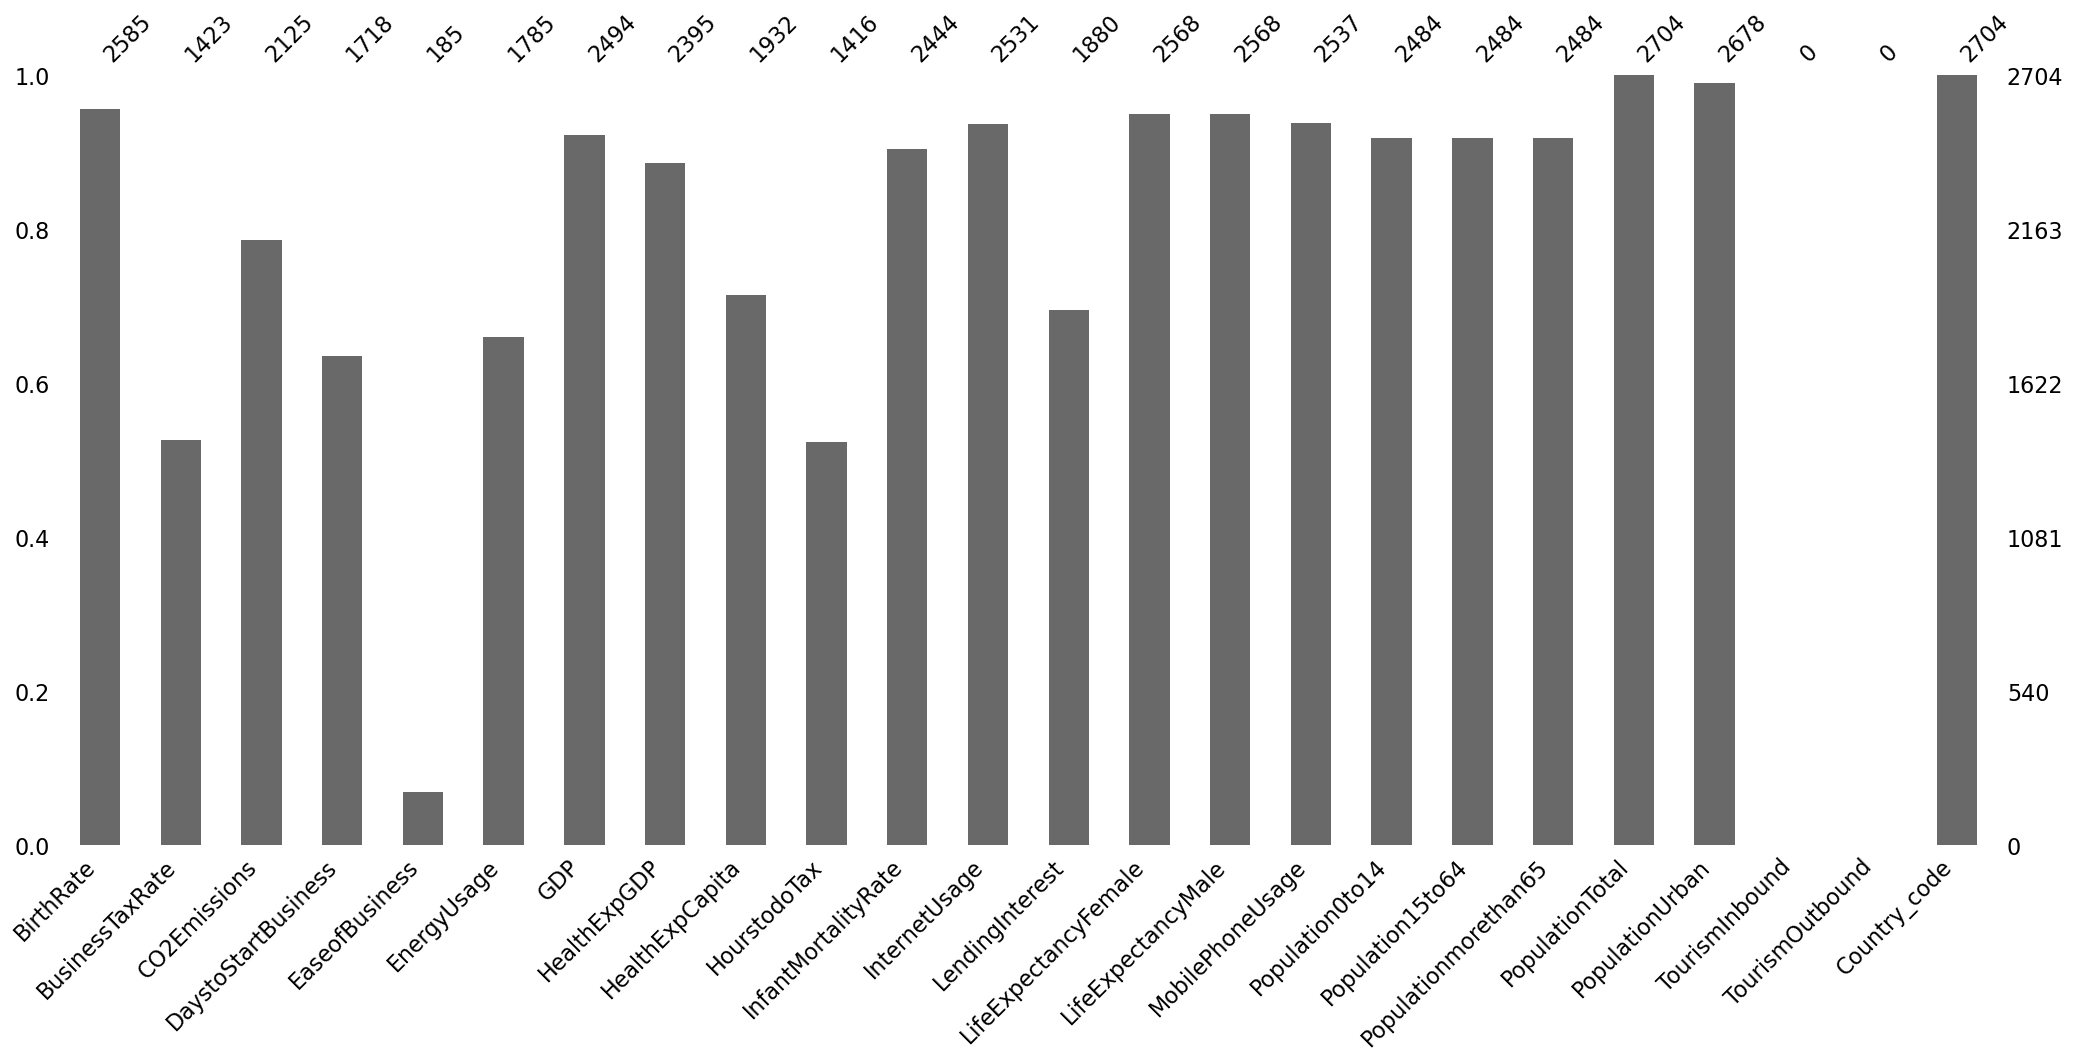

In [15]:
import missingno as msno
msno.bar(data)
plt.show()

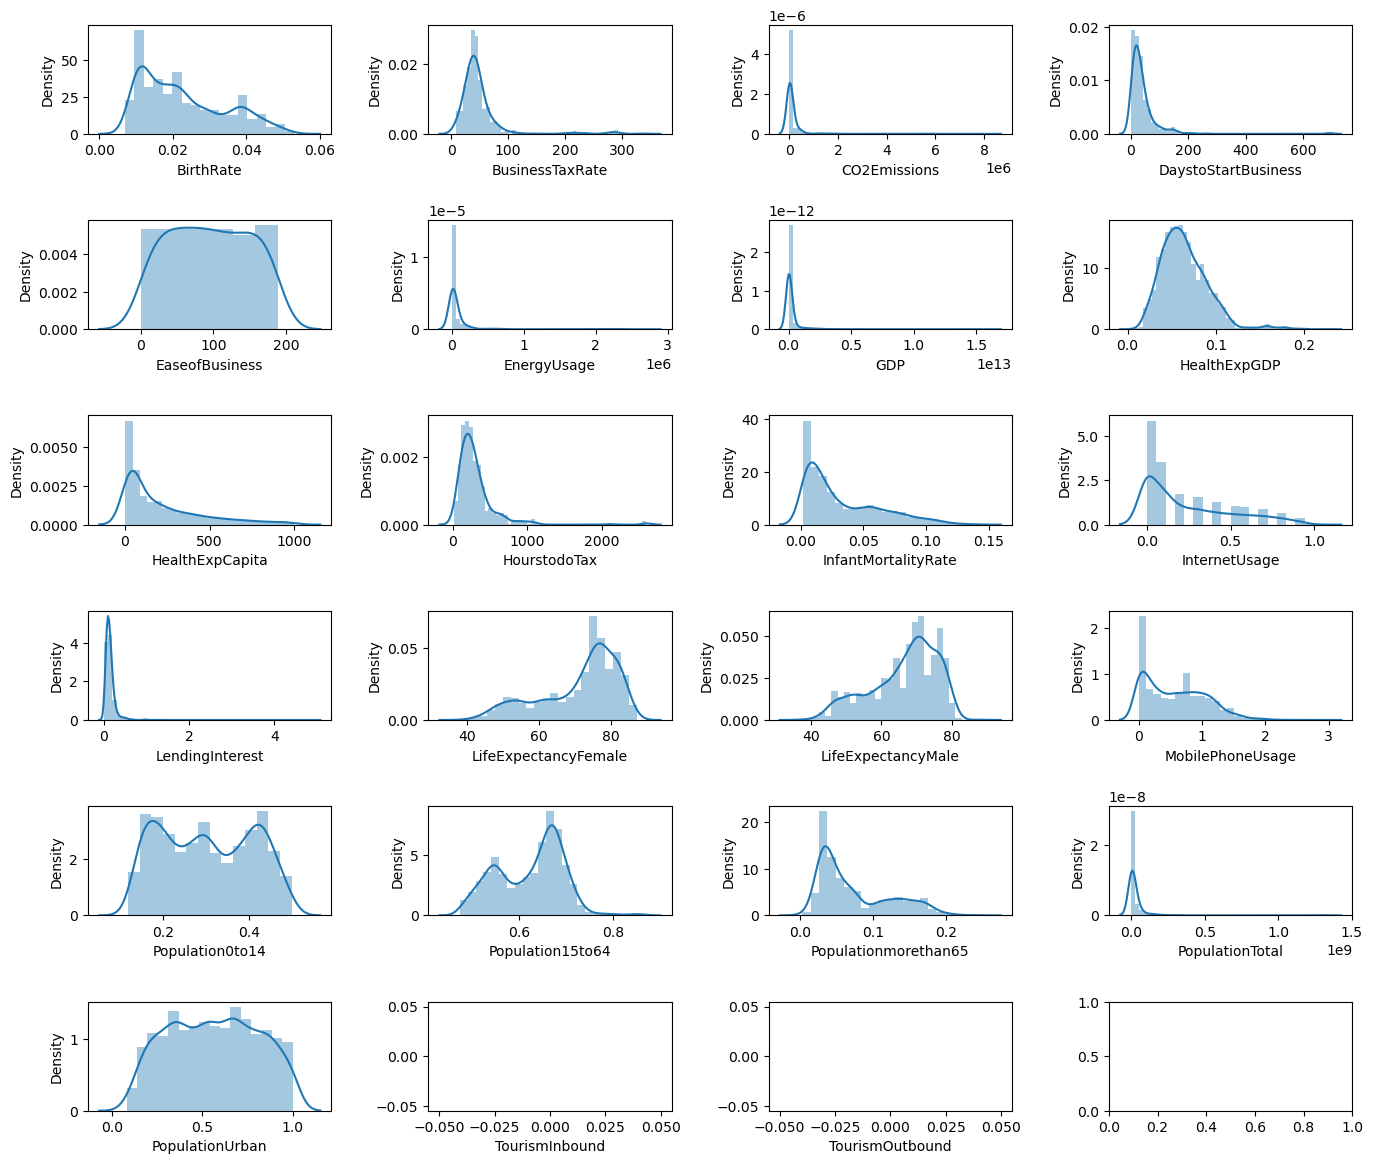

In [16]:
#check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(data.BirthRate,ax=axes[0,0])
sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
sns.distplot(data.CO2Emissions,ax=axes[0,2])
sns.distplot(data.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(data.EaseofBusiness,ax=axes[1,0])
sns.distplot(data.EnergyUsage,ax=axes[1,1])
sns.distplot(data.GDP,ax=axes[1,2])
sns.distplot(data.HealthExpGDP,ax=axes[1,3])
sns.distplot(data.HealthExpCapita,ax=axes[2,0])
sns.distplot(data.HourstodoTax,ax=axes[2,1])
sns.distplot(data.InfantMortalityRate,ax=axes[2,2])
sns.distplot(data.InternetUsage,ax=axes[2,3,])
sns.distplot(data.LendingInterest,ax=axes[3,0])
sns.distplot(data.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(data.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(data.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(data.Population0to14,ax=axes[4,0])          
sns.distplot(data.Population15to64,ax=axes[4,1])
sns.distplot(data.Populationmorethan65,ax=axes[4,2])
sns.distplot(data.PopulationTotal,ax=axes[4,3])
sns.distplot(data.PopulationUrban,ax=axes[5,0])
sns.distplot(data.TourismInbound,ax=axes[5,1])
sns.distplot(data.TourismOutbound,ax=axes[5,2])
plt.tight_layout(pad=2.0)

In [17]:
#Repalce missing values by mean
data['BusinessTaxRate']= data['BusinessTaxRate'].fillna(data['BusinessTaxRate'].mean())
data['EaseofBusiness']= data['EaseofBusiness'].fillna(data['EaseofBusiness'].mean())
data['HealthExpGDP']= data['HealthExpGDP'].fillna(data['HealthExpGDP'].mean())
data['HourstodoTax']= data['HourstodoTax'].fillna(data['HourstodoTax'].mean())
data['Population0to14 ']= data['Population0to14'].fillna(data['Population0to14'].mean())
data['PopulationUrban'] =data['PopulationUrban'].fillna(data['PopulationUrban'].mean())
data['HealthExpCapita']= data['HealthExpCapita'].fillna(data['HealthExpCapita'].mean())


#Replace missing values by median
data['BirthRate']= data['BirthRate'].fillna(data['BirthRate'].median())
data['CO2Emissions']= data['CO2Emissions'].fillna(data['CO2Emissions'].median())
data['DaystoStartBusiness']= data['DaystoStartBusiness'].fillna(data['DaystoStartBusiness'].median())
data['EnergyUsage']= data['EnergyUsage'].fillna(data['EnergyUsage'].median())
data['GDP']= data['GDP'].fillna(data['GDP'].median())
data['InfantMortalityRate']= data['InfantMortalityRate'].fillna(data['InfantMortalityRate'].median())
data['InternetUsage']= data['InternetUsage'].fillna(data['InternetUsage'].median())
data['LendingInterest']= data['LendingInterest'].fillna(data['LendingInterest'].median())
data['LifeExpectancyFemale']= data['LifeExpectancyFemale'].fillna(data['LifeExpectancyFemale'].median())
data['LifeExpectancyMale']= data['LifeExpectancyMale'].fillna(data['LifeExpectancyMale'].median())
data['MobilePhoneUsage']= data['MobilePhoneUsage'].fillna(data['MobilePhoneUsage'].median())
data['TourismInbound']= data['TourismInbound'].fillna(data['TourismInbound'].median())
data['TourismOutbound']= data['TourismOutbound'].fillna(data['TourismOutbound'].median())
data['Population15to64']= data['Population15to64'].fillna(data['Population15to64'].median())
data['Populationmorethan65']= data['Populationmorethan65'].fillna(data['Populationmorethan65'].median())


In [18]:
#check the missing values
print("{} missing values present in whole data.".format(data.isnull().sum().sum()))

5628 missing values present in whole data.


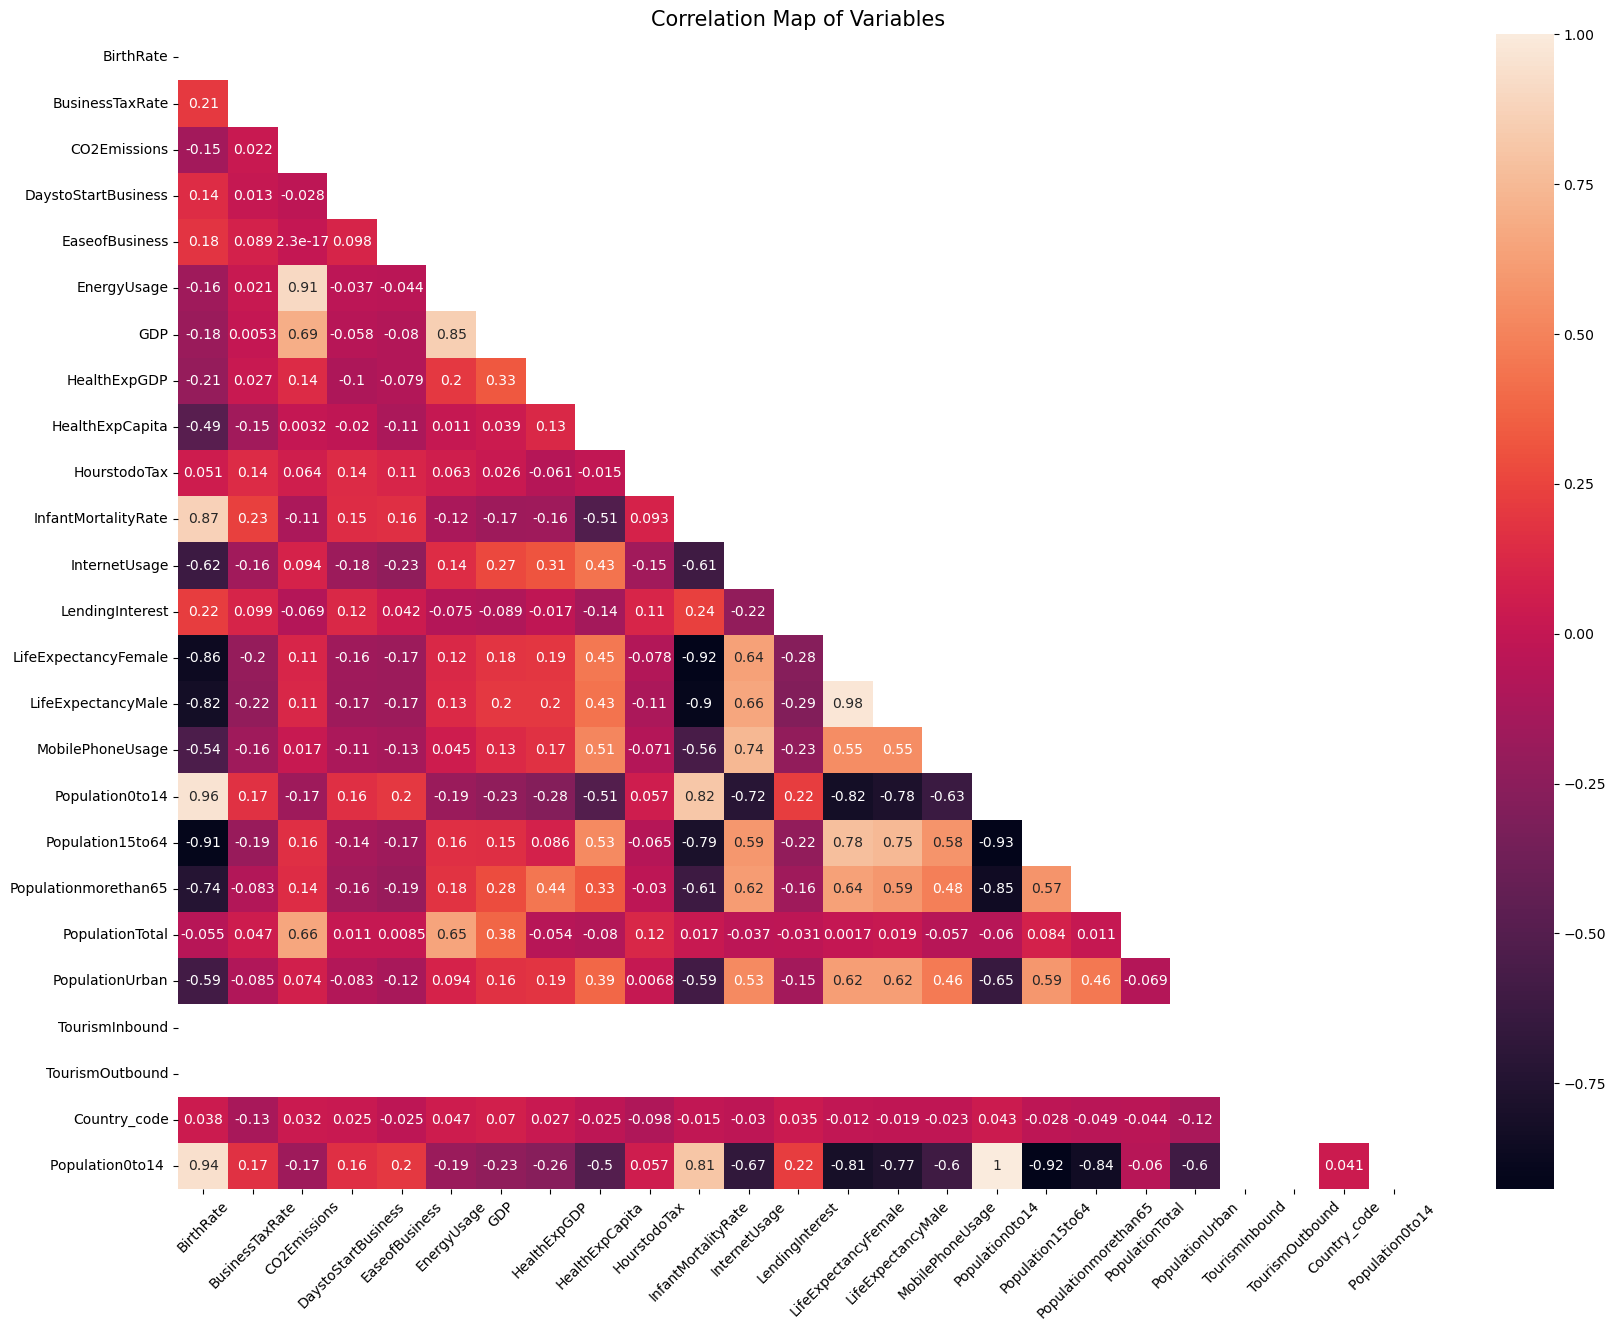

In [19]:
#create a mask for the diagonal values
mask = np.triu(np.ones_like(data.corr(),dtype=bool))
#visualize relation between variables
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True, mask=mask)
plt.xticks(rotation=45)
plt.title('Correlation Map of Variables',fontsize=15)
plt.show()

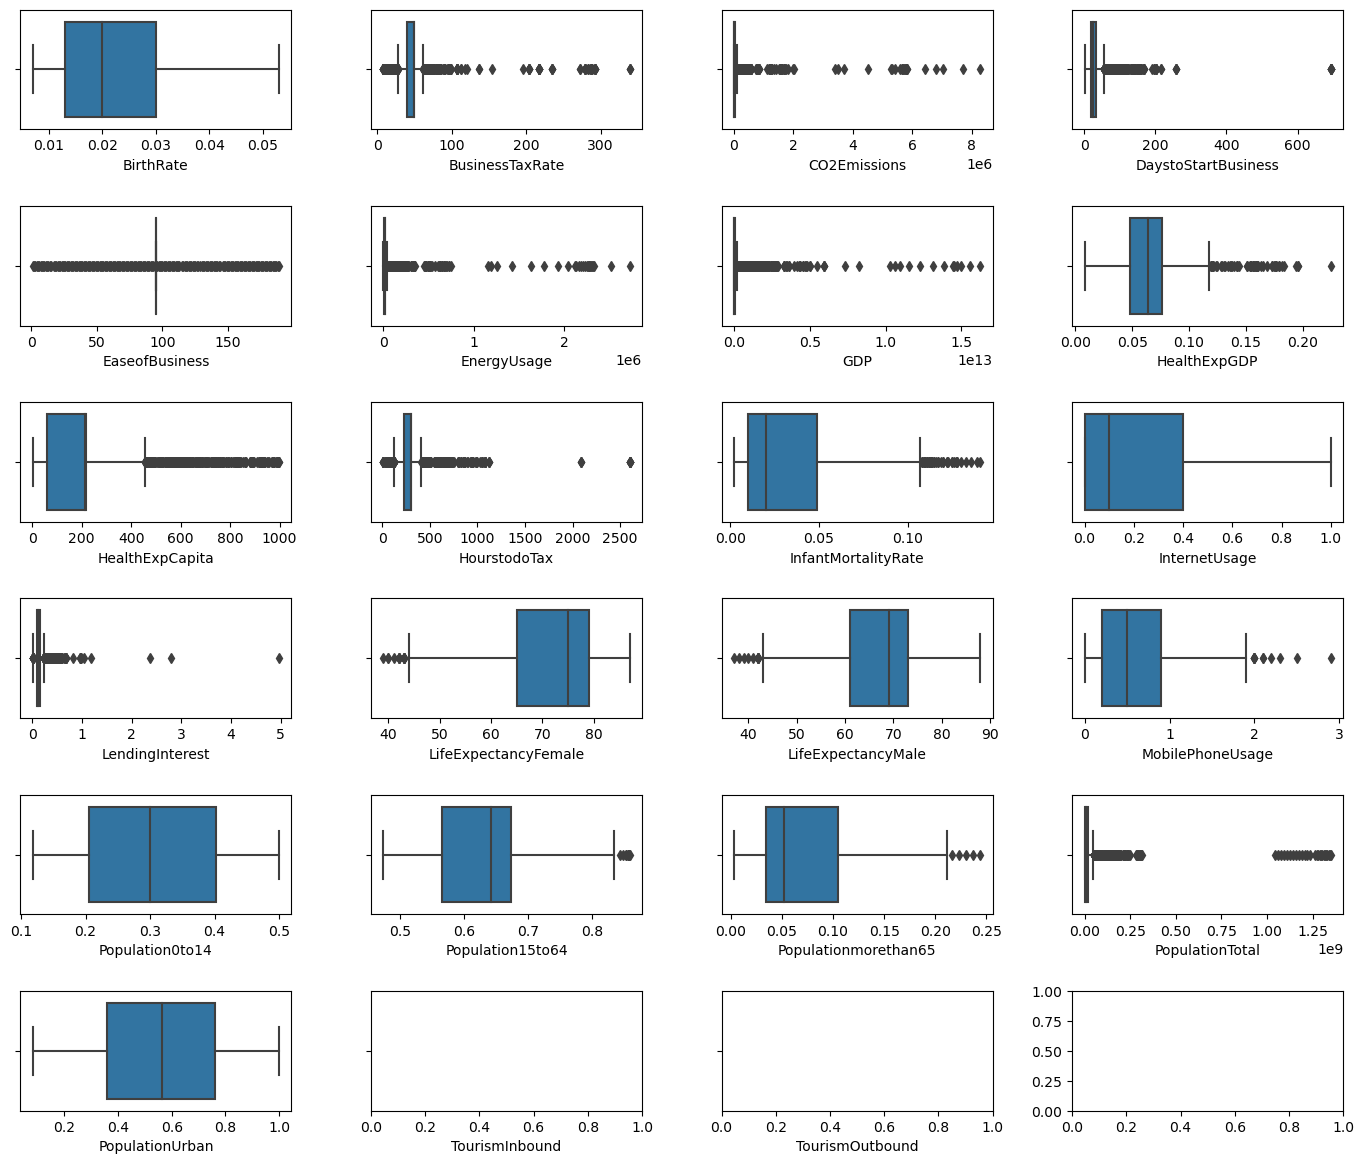

In [20]:
#check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(data.BirthRate,ax=axes[0,0])
sns.boxplot(data.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(data.CO2Emissions,ax=axes[0,2])
sns.boxplot(data.DaystoStartBusiness,ax=axes[0,3])
sns.boxplot(data.EaseofBusiness,ax=axes[1,0])
sns.boxplot(data.EnergyUsage,ax=axes[1,1])
sns.boxplot(data.GDP,ax=axes[1,2])
sns.boxplot(data.HealthExpGDP,ax=axes[1,3])
sns.boxplot(data.HealthExpCapita,ax=axes[2,0])
sns.boxplot(data.HourstodoTax,ax=axes[2,1])
sns.boxplot(data.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(data.InternetUsage,ax=axes[2,3,])
sns.boxplot(data.LendingInterest,ax=axes[3,0])
sns.boxplot(data.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(data.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(data.MobilePhoneUsage,ax=axes[3,3])
sns.boxplot(data.Population0to14,ax=axes[4,0])          
sns.boxplot(data.Population15to64,ax=axes[4,1])
sns.boxplot(data.Populationmorethan65,ax=axes[4,2])
sns.boxplot(data.PopulationTotal,ax=axes[4,3])
sns.boxplot(data.PopulationUrban,ax=axes[5,0])
sns.boxplot(data.TourismInbound,ax=axes[5,1])
sns.boxplot(data.TourismOutbound,ax=axes[5,2])
plt.tight_layout(pad=2.0)

# Method 1


# Remove Outliers

In [21]:
##making copy of data
data1 = data.copy()

In [22]:
#outlier removal
Q1 =data1.quantile(0.25)
Q3 =data1.quantile(0.75)
IQR = Q3-Q1
data1 = data1[~((data1 <(Q1 -1.5 * IQR)) |(data1 > (Q3 +1.5 * IQR))).any(axis=1)]

In [23]:
data1.shape

(1061, 25)

# Scaling

In [24]:
#standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(data1)

# Apply PCA

In [25]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Used for imputing missing values

# Assuming scale_data is your dataset
# If not, replace it with your actual dataset
# scale_data should be a 2D array where rows are samples and columns are features

# Step 1: Impute missing values if any
imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy
imputed_data = imputer.fit_transform(scale_data)

# Step 2: Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Create PCA instance
pc = PCA()

# Fit and transform the scaled data using PCA
pc_components = pc.fit_transform(scaled_data)

# Print the explained variance ratio for each component
print("Explained variance ratio for each component:")
print(pc.explained_variance_ratio_)

# Print the cumulative explained variance ratio
print("Cumulative explained variance ratio:")
print(np.cumsum(pc.explained_variance_ratio_))

Explained variance ratio for each component:
[4.22942078e-01 1.07323164e-01 8.10592864e-02 5.44153265e-02
 5.01345051e-02 4.46586999e-02 3.56243622e-02 3.08825757e-02
 2.97493103e-02 2.77339703e-02 2.27683969e-02 2.16384361e-02
 1.70264597e-02 1.66671861e-02 1.16277692e-02 1.05632912e-02
 7.81935340e-03 4.18547484e-03 2.40782533e-03 6.60911874e-04
 1.10873575e-04 7.43110820e-07 9.20350898e-37]
Cumulative explained variance ratio:
[0.42294208 0.53026524 0.61132453 0.66573986 0.71587436 0.76053306
 0.79615742 0.82704    0.85678931 0.88452328 0.90729168 0.92893011
 0.94595657 0.96262376 0.97425153 0.98481482 0.99263417 0.99681965
 0.99922747 0.99988838 0.99999926 1.         1.        ]


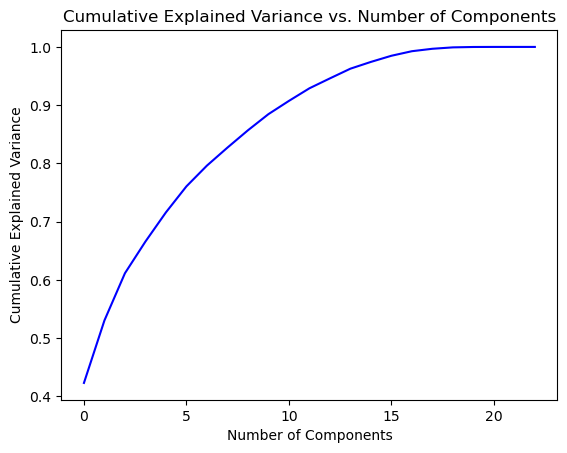

In [26]:
import matplotlib.pyplot as plt

# Assuming pc_components contains the PCA components
cumulative_variance = np.cumsum(pc.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(cumulative_variance, color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()


In [27]:
data_pca = pc_components[:,:15] 

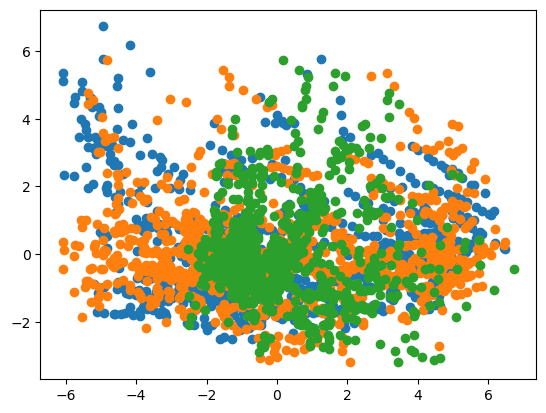

In [28]:
#plot between PCA's
x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()

# Model building

# K-Means Clustering

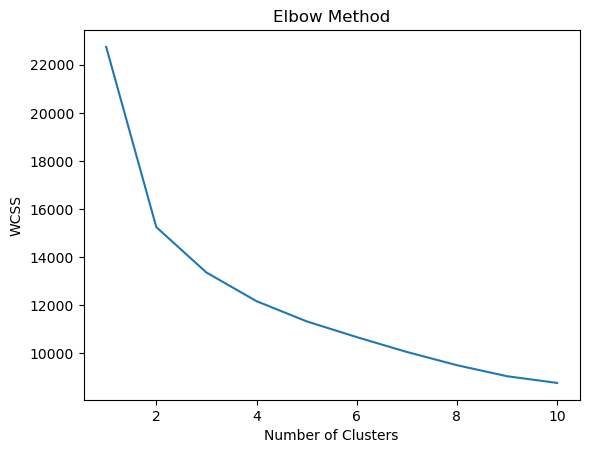

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

WCSS = []  # List to store the within-cluster sum of squares (WCSS)

# Assuming data_pca is your input data

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_pca)
    WCSS.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


.Elbow point is 3

In [30]:
#creating clusters 
kmeans = KMeans(n_clusters=3, init ='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_pca)

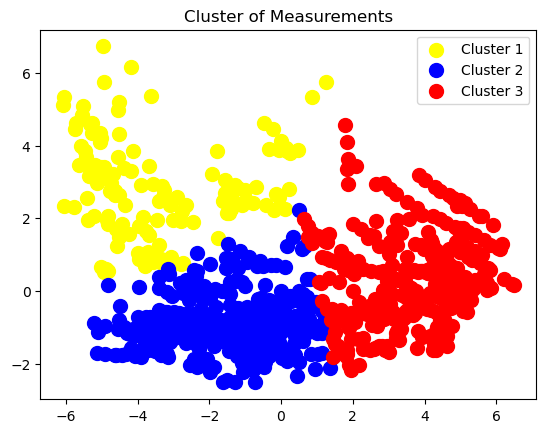

In [31]:
plt.scatter(data_pca[y_kmeans ==0,0],data_pca[y_kmeans ==0,1],s =100,c ='yellow',label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans ==1,0],data_pca[y_kmeans ==1,1],s =100,c ='blue',label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans ==2,0],data_pca[y_kmeans ==2,1],s =100,c ='red',label = 'Cluster 3')
plt.title('Cluster of Measurements')
plt.legend()
plt.show()

In [32]:
#Accuracy check
from sklearn.metrics import silhouette_score
sl_kmeans = silhouette_score(data_pca,y_kmeans)
print('silhouette_score for K-means clustering :',sl_kmeans)

silhouette_score for K-means clustering : 0.26895293336289516


# Hierarchy Clustering

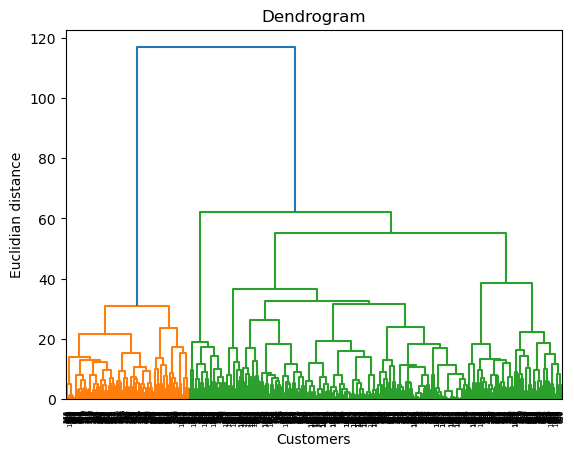

In [33]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian distance')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc =AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)

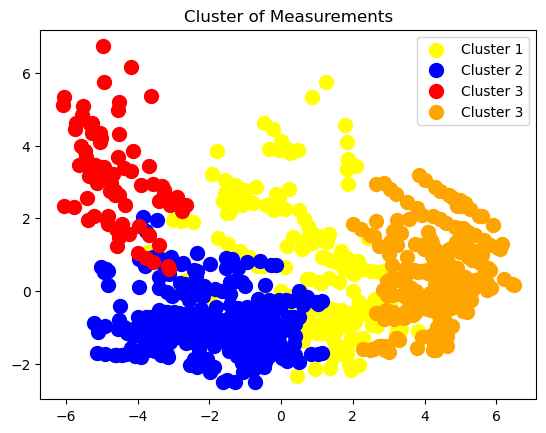

In [35]:
plt.scatter(data_pca[y_hc ==0,0],data_pca[y_hc ==0,1],s =100,c ='yellow',label = 'Cluster 1')
plt.scatter(data_pca[y_hc ==1,0],data_pca[y_hc ==1,1],s =100,c ='blue',label = 'Cluster 2')
plt.scatter(data_pca[y_hc ==2,0],data_pca[y_hc ==2,1],s =100,c ='red',label = 'Cluster 3')
plt.scatter(data_pca[y_hc ==3,0],data_pca[y_hc ==3,1],s =100,c ='orange',label = 'Cluster 3')
plt.title('Cluster of Measurements')
plt.legend()
plt.show()

In [36]:
sl_hierarchy = silhouette_score(data_pca,y_hc)
print('silhouette_score for Hierarchy clustering :',sl_hierarchy)

silhouette_score for Hierarchy clustering : 0.20827756653250593


# DBSCAN Clustering

In [37]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

#fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)


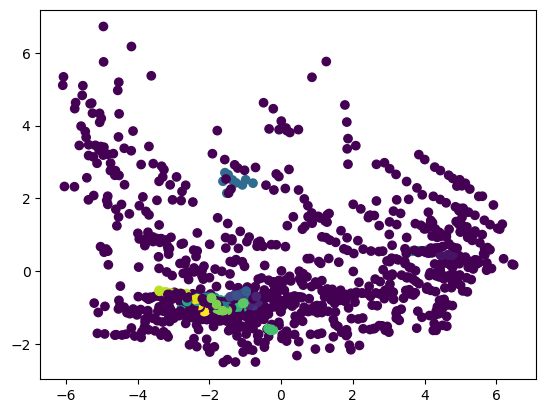

In [38]:
plt.scatter(data_pca[:,0],data_pca[:,1],c=dbscan_labels)
plt.show()

In [39]:
data1['cluster']=dbscan.labels_
data1.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_code,Population0to14,cluster
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.035,60.0,302.068503,...,0.342,0.619,0.039,31719449.0,0.599,NaN,NaN,2.0,0.342,-1
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.043,15.0,302.068503,...,0.454,0.517,0.029,6949366.0,0.383,NaN,NaN,20.0,0.454,-1
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.047,152.0,302.068503,...,0.383,0.587,0.029,1755375.0,0.532,NaN,NaN,25.0,0.383,-1
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.051,12.0,302.068503,...,0.468,0.505,0.028,11607944.0,0.178,NaN,NaN,29.0,0.468,-1
5,0.042,48.966901,301.0,26.0,94.875676,14338.0,8.704861e+08,0.063,7.0,302.068503,...,0.490,0.481,0.029,6674286.0,0.082,NaN,NaN,30.0,0.490,-1


In [40]:
#use pandas filtering and get noisy datapoints -1
data1[data1['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_code,Population0to14,cluster
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.03500,60.000000,302.068503,...,0.342,0.6190,0.039,31719449.0,0.599,NaN,NaN,2.0,0.342000,-1
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.04300,15.000000,302.068503,...,0.454,0.5170,0.029,6949366.0,0.383,NaN,NaN,20.0,0.454000,-1
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,152.000000,302.068503,...,0.383,0.5870,0.029,1755375.0,0.532,NaN,NaN,25.0,0.383000,-1
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.05100,12.000000,302.068503,...,0.468,0.5050,0.028,11607944.0,0.178,NaN,NaN,29.0,0.468000,-1
5,0.042,48.966901,301.0,26.0,94.875676,14338.0,8.704861e+08,0.06300,7.000000,302.068503,...,0.490,0.4810,0.029,6674286.0,0.082,NaN,NaN,30.0,0.490000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,0.016,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,214.627847,302.068503,...,0.228,0.6730,0.099,258000.0,0.685,NaN,NaN,135.0,0.228000,-1
2661,0.010,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,214.627847,302.068503,...,0.199,0.6900,0.110,102384.0,0.424,NaN,NaN,9.0,0.199000,-1
2665,0.012,48.966901,8529.0,26.0,94.875676,14338.0,5.473536e+09,0.06417,214.627847,302.068503,...,NaN,0.6425,0.052,64798.0,1.000,NaN,NaN,21.0,0.303051,-1
2669,0.013,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,214.627847,302.068503,...,NaN,0.6425,0.052,57570.0,1.000,NaN,NaN,34.0,0.303051,-1


In [41]:
sl_dbscan = silhouette_score(data_pca,dbscan_labels)
print('silhouette_score for DBSCAN clustering :',sl_dbscan)

silhouette_score for DBSCAN clustering : -0.24968013126083885


DBSCAN is not most  effective on the dataset

# Method 2

 with outliers

In [42]:
##making copy of data
data2 = data.copy()

In [43]:
#standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(data2)

# Apply PCA

In [44]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Used for imputing missing values

# Assuming scale_data is your dataset
# If not, replace it with your actual dataset
# scale_data should be a 2D array where rows are samples and columns are features

# Step 1: Impute missing values if any
imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy
imputed_data = imputer.fit_transform(scale_data)

# Step 2: Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Create PCA instance
pc = PCA()

# Fit and transform the scaled data using PCA
pc_components = pc.fit_transform(scaled_data)

# Print the explained variance ratio for each component
print("Explained variance ratio for each component:")
print(pc.explained_variance_ratio_)

# Print the cumulative explained variance ratio
print("Cumulative explained variance ratio:")
print(np.cumsum(pc.explained_variance_ratio_))

Explained variance ratio for each component:
[3.86934033e-01 1.33443015e-01 5.89541926e-02 5.52029688e-02
 4.76548001e-02 4.13825750e-02 4.00453772e-02 3.46530592e-02
 3.42693674e-02 3.37445534e-02 2.96747980e-02 2.56258446e-02
 2.07545695e-02 1.87791650e-02 1.19094070e-02 9.30567314e-03
 8.70549194e-03 4.07944021e-03 2.36442028e-03 1.81679200e-03
 6.98444581e-04 2.01164848e-06 5.69823638e-33]
Cumulative explained variance ratio:
[0.38693403 0.52037705 0.57933124 0.63453421 0.68218901 0.72357158
 0.76361696 0.79827002 0.83253939 0.86628394 0.89595874 0.92158458
 0.94233915 0.96111832 0.97302773 0.9823334  0.99103889 0.99511833
 0.99748275 0.99929954 0.99999799 1.         1.        ]


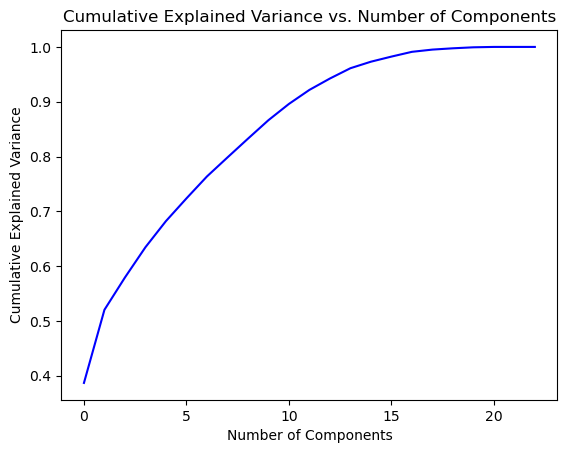

In [45]:
import matplotlib.pyplot as plt

# Assuming pc_components contains the PCA components
cumulative_variance = np.cumsum(pc.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(cumulative_variance, color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

In [46]:
data_pca2= pc_components[:,:15] 

# K-Means Clustering

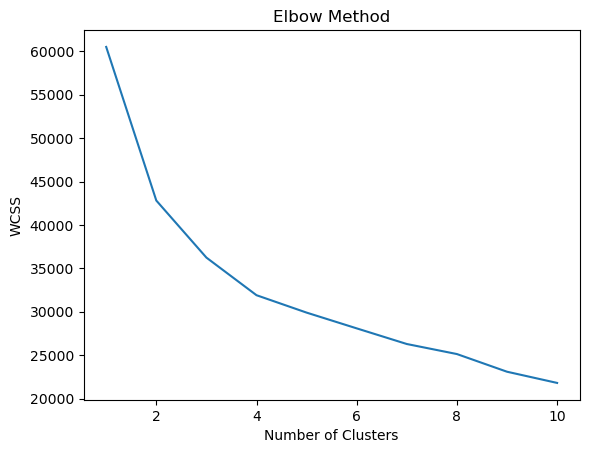

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

WCSS = []  # List to store the within-cluster sum of squares (WCSS)

# Assuming data_pca is your input data

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_pca2)
    WCSS.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [48]:
#creating clusters 
kmeans = KMeans(n_clusters=3, init ='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_pca2)

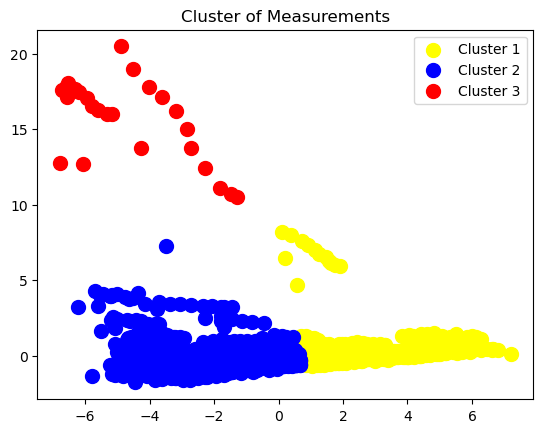

In [49]:
plt.scatter(data_pca2[y_kmeans ==0,0],data_pca2[y_kmeans ==0,1],s =100,c ='yellow',label = 'Cluster 1')
plt.scatter(data_pca2[y_kmeans ==1,0],data_pca2[y_kmeans ==1,1],s =100,c ='blue',label = 'Cluster 2')
plt.scatter(data_pca2[y_kmeans ==2,0],data_pca2[y_kmeans ==2,1],s =100,c ='red',label = 'Cluster 3')
plt.title('Cluster of Measurements')
plt.legend()
plt.show()

In [50]:
#Accuracy check
from sklearn.metrics import silhouette_score
sl_kmeans = silhouette_score(data_pca2,y_kmeans)
print('silhouette_score for K-means clustering :',sl_kmeans)

silhouette_score for K-means clustering : 0.3255480468361085


# Hierarchy Clustering

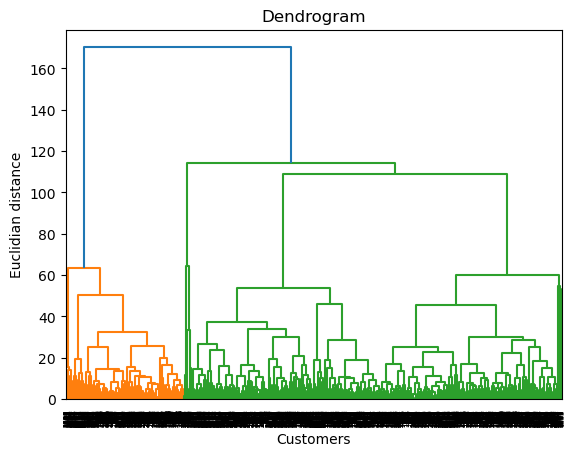

In [51]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca2,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian distance')
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc =AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca2)

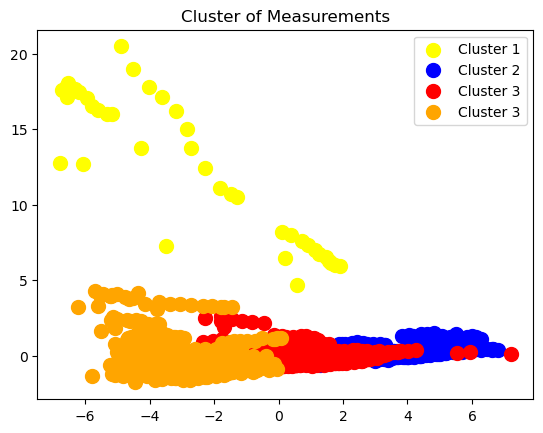

In [53]:
plt.scatter(data_pca2[y_hc ==0,0],data_pca2[y_hc ==0,1],s =100,c ='yellow',label = 'Cluster 1')
plt.scatter(data_pca2[y_hc ==1,0],data_pca2[y_hc ==1,1],s =100,c ='blue',label = 'Cluster 2')
plt.scatter(data_pca2[y_hc ==2,0],data_pca2[y_hc ==2,1],s =100,c ='red',label = 'Cluster 3')
plt.scatter(data_pca2[y_hc ==3,0],data_pca2[y_hc ==3,1],s =100,c ='orange',label = 'Cluster 3')
plt.title('Cluster of Measurements')
plt.legend()
plt.show()

In [54]:
sl_hierarchy = silhouette_score(data_pca2,y_hc)
print('silhouette_score for Hierarchy clustering :',sl_hierarchy)

silhouette_score for Hierarchy clustering : 0.1927080295849512


# DBSCAN Clustering

In [55]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

#fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca2)


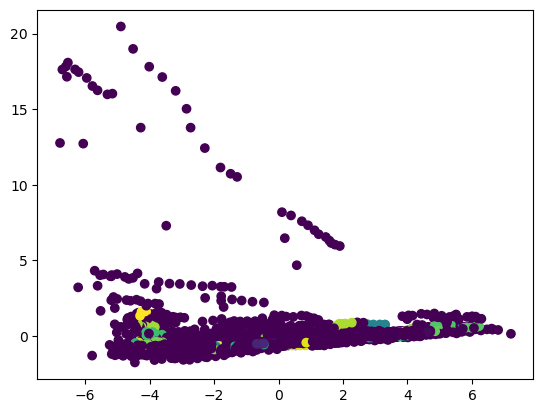

In [56]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan_labels)
plt.show()

In [57]:
data2['cluster']=dbscan.labels_
data2.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_code,Population0to14,cluster
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.035,60.0,302.068503,...,0.342,0.619,0.039,31719449.0,0.599,NaN,NaN,2.0,0.342,24
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.034,22.0,302.068503,...,0.476,0.499,0.025,13924930.0,0.324,NaN,NaN,5.0,0.476,-1
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.043,15.0,302.068503,...,0.454,0.517,0.029,6949366.0,0.383,NaN,NaN,20.0,0.454,9
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.047,152.0,302.068503,...,0.383,0.587,0.029,1755375.0,0.532,NaN,NaN,25.0,0.383,-1
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.051,12.0,302.068503,...,0.468,0.505,0.028,11607944.0,0.178,NaN,NaN,29.0,0.468,34


In [58]:
#use pandas filtering and get noisy datapoints -1
data2[data2['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_code,Population0to14,cluster
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.03400,22.000000,302.068503,...,0.476,0.499,0.025,13924930.0,0.324,NaN,NaN,5.0,0.476,-1
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,152.000000,302.068503,...,0.383,0.587,0.029,1755375.0,0.532,NaN,NaN,25.0,0.383,-1
5,0.042,48.966901,301.0,26.0,94.875676,14338.0,8.704861e+08,0.06300,7.000000,302.068503,...,0.490,0.481,0.029,6674286.0,0.082,NaN,NaN,30.0,0.490,-1
8,0.051,48.966901,176.0,26.0,94.875676,14338.0,1.385058e+09,0.06300,10.000000,302.068503,...,0.490,0.482,0.028,8301151.0,0.216,NaN,NaN,36.0,0.490,-1
9,0.039,48.966901,84.0,26.0,94.875676,14338.0,2.018999e+08,0.03500,13.000000,302.068503,...,0.415,0.554,0.031,528312.0,0.281,NaN,NaN,40.0,0.415,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0.015,29.100000,8529.0,41.0,63.000000,14338.0,2.343634e+10,0.05400,972.000000,210.000000,...,0.207,0.705,0.088,1337439.0,0.088,NaN,NaN,189.0,0.207,-1
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,214.627847,175.000000,...,0.196,0.667,0.136,313873685.0,0.811,NaN,NaN,198.0,0.196,-1
2701,0.015,41.900000,8529.0,7.0,85.000000,14338.0,5.000435e+10,0.08900,214.627847,310.000000,...,0.220,0.639,0.140,3395253.0,0.948,NaN,NaN,199.0,0.220,-1
2702,0.020,61.900000,8529.0,144.0,180.000000,14338.0,3.812862e+11,0.04600,593.000000,792.000000,...,0.288,0.652,0.060,29954782.0,0.889,NaN,NaN,202.0,0.288,-1


In [59]:
sl_dbscan = silhouette_score(data_pca2,dbscan_labels)
print('silhouette_score for DBSCAN clustering :',sl_dbscan)

silhouette_score for DBSCAN clustering : -0.33585911900010457


In [60]:
##making copy of data
data3 = data.copy()

In [61]:
from sklearn.manifold import TSNE

# Assuming data_pca is your input data
# Assuming n_components is the desired number of dimensions for the output

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit the data and transform it to the lower-dimensional space
data_tsne = tsne.fit_transform(data_pca)

In [62]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Used for imputing missing values

# Assuming scale_data is your dataset
# If not, replace it with your actual dataset
# scale_data should be a 2D array where rows are samples and columns are features

# Step 1: Impute missing values if any
imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy
imputed_data = imputer.fit_transform(scale_data)

# Step 2: Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Create t-SNE instance
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the scaled data using t-SNE
tsne_components = tsne.fit_transform(scaled_data)

# Print the transformed data shape
print("Shape of transformed data using t-SNE:", tsne_components.shape)

# Print the explained variance ratio for each component
print("Explained variance ratio for each component:")
print(pc.explained_variance_ratio_)

# Print the cumulative explained variance ratio
print("Cumulative explained variance ratio:")
print(np.cumsum(pc.explained_variance_ratio_))

Shape of transformed data using t-SNE: (2704, 2)
Explained variance ratio for each component:
[3.86934033e-01 1.33443015e-01 5.89541926e-02 5.52029688e-02
 4.76548001e-02 4.13825750e-02 4.00453772e-02 3.46530592e-02
 3.42693674e-02 3.37445534e-02 2.96747980e-02 2.56258446e-02
 2.07545695e-02 1.87791650e-02 1.19094070e-02 9.30567314e-03
 8.70549194e-03 4.07944021e-03 2.36442028e-03 1.81679200e-03
 6.98444581e-04 2.01164848e-06 5.69823638e-33]
Cumulative explained variance ratio:
[0.38693403 0.52037705 0.57933124 0.63453421 0.68218901 0.72357158
 0.76361696 0.79827002 0.83253939 0.86628394 0.89595874 0.92158458
 0.94233915 0.96111832 0.97302773 0.9823334  0.99103889 0.99511833
 0.99748275 0.99929954 0.99999799 1.         1.        ]


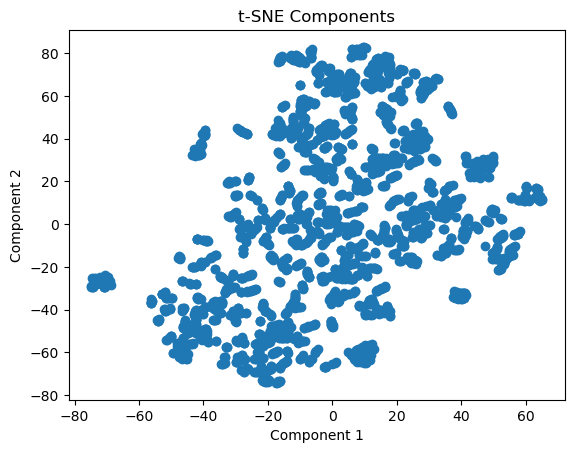

In [63]:
import matplotlib.pyplot as plt

# Assuming tsne_components contains the t-SNE components

# Plot the transformed data using t-SNE
plt.scatter(tsne_components[:, 0], tsne_components[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Components')
plt.show()

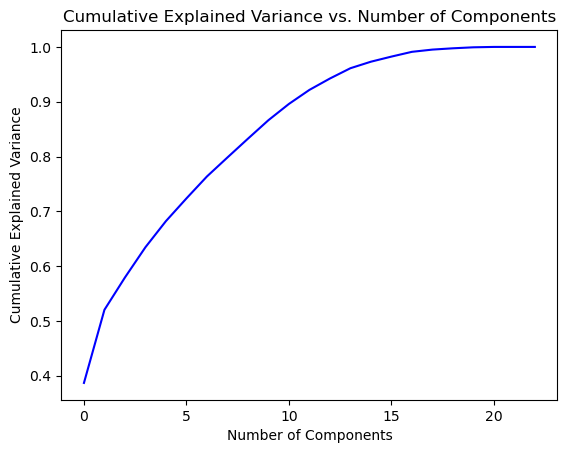

In [64]:
import matplotlib.pyplot as plt

# Assuming pc_components contains the PCA components
cumulative_variance = np.cumsum(pc.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(cumulative_variance, color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

In [65]:
data_tsne3= tsne_components[:,:15] 

# K-means clustering

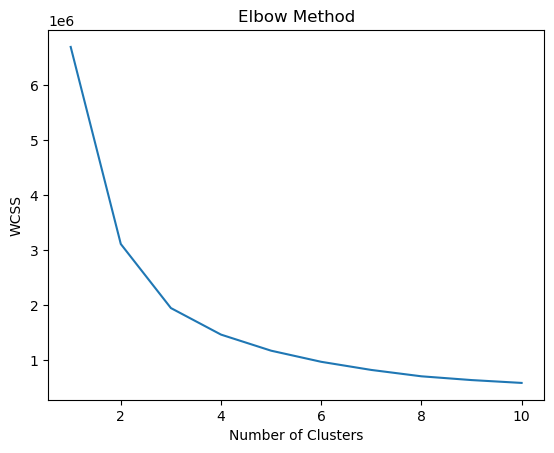

In [66]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

WCSS = []  # List to store the within-cluster sum of squares (WCSS)

# Assuming data_pca is your input data

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_tsne3)
    WCSS.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [67]:
#creating clusters 
kmeans = KMeans(n_clusters=3, init ='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_tsne3)

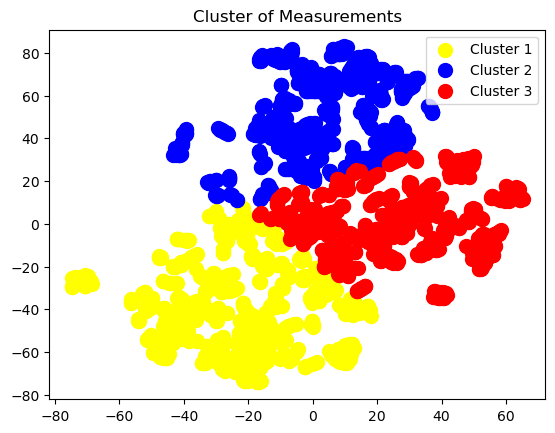

In [68]:
plt.scatter(data_tsne3[y_kmeans ==0,0],data_tsne3[y_kmeans ==0,1],s =100,c ='yellow',label = 'Cluster 1')
plt.scatter(data_tsne3[y_kmeans ==1,0],data_tsne3[y_kmeans ==1,1],s =100,c ='blue',label = 'Cluster 2')
plt.scatter(data_tsne3[y_kmeans ==2,0],data_tsne3[y_kmeans ==2,1],s =100,c ='red',label = 'Cluster 3')
plt.title('Cluster of Measurements')
plt.legend()
plt.show()

In [69]:
#Accuracy check
from sklearn.metrics import silhouette_score
sl_kmeans = silhouette_score(data_tsne3,y_kmeans)
print('silhouette_score for K-means clustering :',sl_kmeans)

silhouette_score for K-means clustering : 0.42890307


# Hierarchy clustering

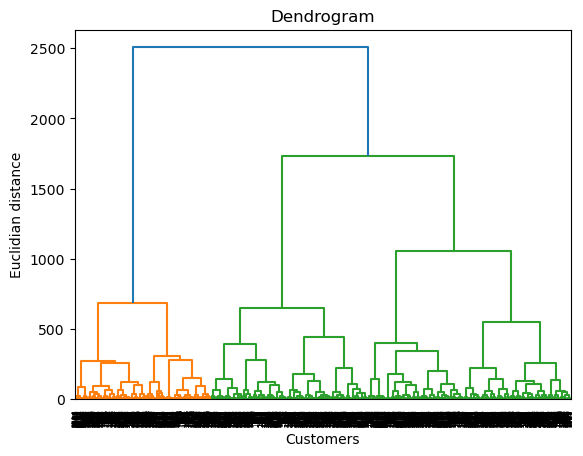

In [70]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_tsne3,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian distance')
plt.show()

In [71]:
from sklearn.cluster import AgglomerativeClustering
hc =AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne3)

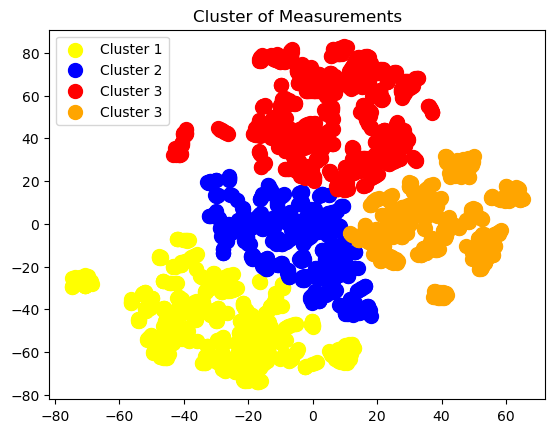

In [72]:
plt.scatter(data_tsne3[y_hc ==0,0],data_tsne3[y_hc ==0,1],s =100,c ='yellow',label = 'Cluster 1')
plt.scatter(data_tsne3[y_hc ==1,0],data_tsne3[y_hc ==1,1],s =100,c ='blue',label = 'Cluster 2')
plt.scatter(data_tsne3[y_hc ==2,0],data_tsne3[y_hc ==2,1],s =100,c ='red',label = 'Cluster 3')
plt.scatter(data_tsne3[y_hc ==3,0],data_tsne3[y_hc ==3,1],s =100,c ='orange',label = 'Cluster 3')
plt.title('Cluster of Measurements')
plt.legend()
plt.show()

In [73]:
sl_hierarchy = silhouette_score(data_tsne3,y_hc)
print('silhouette_score for Hierarchy clustering :',sl_hierarchy)

silhouette_score for Hierarchy clustering : 0.40617046


In [74]:
data = pd.DataFrame({
    'Method': ['M1 kmeans', 'M1 Hierarchy', 'M1 DBSCAN', 'M2 kmeans', 'M2 Hierarchy', 'M2 DBSCAN', 'M3 kmeans', 'M3 Hierarchy'],
    'Silhouette Score': [sl_kmeans, sl_hierarchy, sl_dbscan, sl_kmeans, sl_hierarchy, sl_dbscan, sl_kmeans, sl_hierarchy]
})

print(data)

         Method  Silhouette Score
0     M1 kmeans          0.428903
1  M1 Hierarchy          0.406170
2     M1 DBSCAN         -0.335859
3     M2 kmeans          0.428903
4  M2 Hierarchy          0.406170
5     M2 DBSCAN         -0.335859
6     M3 kmeans          0.428903
7  M3 Hierarchy          0.406170


# conclusion

 By comparing Silhouette Score for each method we get highest Silhouette Score is 0.428 for method 3
    
the tsne algorithm gives the best outlier of the dataset

In [75]:
import pandas as pd
import pickle


#Save the data as a pickle file
data_filname ="world_development_data.pkl"
with open(data_filname,'wb') as data_file:
    pickle.dump(data,data_file)

print(f"csv data saved as {data_filname}")

csv data saved as world_development_data.pkl
